# task1
## Overview: A client is opening a new store and wants a customer segmentation to target a specific segment
## Objective: Find the highest spending segments and the reason behind it, choose a suitable segment to dive deeper into and provide deep insights regarding this segment

### Importing Important libraries

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data Importing

In [7]:
transactions=pd.read_excel('QVI_transaction_data.xlsx')
Purchase=pd.read_csv('QVI_purchase_behaviour.csv')

### Data Exploration
#### Purchase Dataset

In [8]:
Purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [9]:
Purchase.shape

(72637, 3)

In [10]:
print(Purchase['LIFESTAGE'].unique())
Purchase['LIFESTAGE'].nunique()

['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']


7

In [11]:
Purchase['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [12]:
print(Purchase['PREMIUM_CUSTOMER'].unique())
Purchase['PREMIUM_CUSTOMER'].nunique()

['Premium' 'Mainstream' 'Budget']


3

In [13]:
Purchase['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [14]:
Purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
#Check if lylty card number values are unique
Purchase['LYLTY_CARD_NBR'].nunique() == Purchase.shape[0]

True

### Transactions dataset

In [16]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [17]:
 transactions.shape

(264836, 8)

In [18]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [19]:
for column in transactions.columns:
    print(column,':',transactions[column].nunique())

DATE : 364
STORE_NBR : 272
LYLTY_CARD_NBR : 72637
TXN_ID : 263127
PROD_NBR : 114
PROD_NAME : 114
PROD_QTY : 6
TOT_SALES : 112


In [20]:
transactions.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,NaN,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,NaN,2.000000,9.200000


In [21]:
transactions.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [22]:
transactions.duplicated().sum()

1

In [23]:
transactions[transactions.duplicated()==True]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


#### Usually duplicated values are removed but for this dataset, a duplicate value might not be an error as cashier scanning the same product twice which seems reasonable as it's only 1 duplicate in the entire dataset

In [24]:
#checking prod names
transactions['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [25]:
#checking distribution of product quantites sold in a single transaction
transactions['PROD_QTY'].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

#### 200 Seems suspicious which will be dealt with later

In [26]:
transactions['TOT_SALES'].value_counts()

9.2      22821
7.4      22513
6.0      20798
7.6      20212
8.8      19900
         ...  
9.3          3
6.9          3
650.0        2
11.2         2
12.4         2
Name: TOT_SALES, Length: 112, dtype: int64

### Data Cleaning and Engineering

In [27]:
#dealing with unusual data points
outliers=transactions[transactions['PROD_QTY']==200].index
transactions=transactions.drop(outliers).reset_index(drop=True)

In [28]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [29]:
#Changing date to it's correct format
from datetime import datetime, timedelta
transactions['DATE']=transactions['DATE'].apply(lambda x: (datetime(1899, 12, 30) + timedelta(days=int(x))).strftime("%m/%d/%Y"))

In [30]:
transactions['DATE']=pd.to_datetime(transactions['DATE'])

In [31]:
transactions['DATE'].value_counts().sort_index()

2018-07-01    724
2018-07-02    711
2018-07-03    722
2018-07-04    714
2018-07-05    712
             ... 
2019-06-26    723
2019-06-27    709
2019-06-28    730
2019-06-29    745
2019-06-30    744
Name: DATE, Length: 364, dtype: int64

In [32]:
#extracting pack size for productname and using it as a column
transactions['pack_size']=transactions['PROD_NAME'].str.extract(r'(\d\d*)')

In [33]:
transactions['pack_size'].value_counts()

175    66390
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: pack_size, dtype: int64

In [34]:
#extracting company name from prodname and using it as a column
transactions['company']=transactions['PROD_NAME'].str.extract(r'(\w*)')

In [35]:
transactions['company'].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: company, dtype: int64

In [36]:
#Removing products that's not chips
salsa=transactions[transactions['company']=='Old'].index
transactions=transactions.drop(salsa).reset_index(drop=True)


In [37]:
#Renaming and combining company names which looks like the same company
transactions['company'].replace([['Smith','Smiths'],['Dorito','Doritos'],['Red','RRD'],['GrnWves','Grain'],['Snbts','Sunbites'],['Infzns','Infuzions']],inplace=True)

In [38]:
transactions['company'].value_counts()

Kettle        67234
Pringles      41149
Thins         23247
WW            18767
Cobs          15761
Tostitos      15448
Twisties      15269
Natural       11039
Tyrrells      10350
CCs            8203
Woolworths     8084
Cheezels       7724
Cheetos        5222
Burger         2900
NCC            2577
French         2536
Name: company, dtype: int64

In [39]:
print(transactions.head())
transactions.shape

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES pack_size  \
0    Natural Chip        Compny SeaSalt175g         2        6.0       175   
1                  CCs Nacho Cheese    175g         3        6.3       175   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9       170   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0       175   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8       150   

   company  
0  Natural  
1      CCs  
2      CCs  
3      CCs  
4   Kettle  


(255510, 10)

In [40]:
#Merging the two datasets together
Total_dataset=pd.merge(transactions,Purchase,how='inner',on='LYLTY_CARD_NBR')


In [41]:
Total_dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,company,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,CCs,MIDAGE SINGLES/COUPLES,Budget


In [42]:
trans_prod_qty=Total_dataset.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TXN_ID':'count','PROD_QTY':'sum'}).rename(columns={'TOT_SALES':'Avg_Sales','TXN_ID':'Total_Transactions'})
trans_prod_qty=trans_prod_qty.sort_values(by='PROD_QTY',ascending=False)

In [43]:
trans_prod_qty

Total_Transactions  PROD_QTY
LIFESTAGE              PREMIUM_CUSTOMER                              
OLDER FAMILIES         Budget                         22402     43581
RETIREES               Mainstream                     20702     39054
YOUNG SINGLES/COUPLES  Mainstream                     19987     37025
YOUNG FAMILIES         Budget                         18450     35810
OLDER SINGLES/COUPLES  Budget                         17733     33930
                       Mainstream                     17700     33820
                       Premium                        17101     32729
RETIREES               Budget                         14632     27685
OLDER FAMILIES         Mainstream                     13770     26833
YOUNG FAMILIES         Mainstream                     12488     24238
RETIREES               Premium                        12590     23931
MIDAGE SINGLES/COUPLES Mainstream                     11373     21743
YOUNG FAMILIES         Premium                        11187     21674
OLDER FAMILIES         Premium                        10833     21079
YOUNG SINGLES/COUPLES  Budget                          8963     16162
MIDAGE SINGLES/COUPLES Premium                         7946     15017
YOUNG SINGLES/COUPLES  Premium                         6103     11003
MIDAGE SINGLES/COUPLES Budget                          4876      9223
NEW FAMILIES           Budget                          2898      5369
                       Mainstream                      2243      4161
                       Premium                         1533      2852

In [44]:
total=Total_dataset.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TOT_SALES':'sum','LYLTY_CARD_NBR':'nunique'}).rename(columns={'LYLTY_CARD_NBR':'number_of_customers'})
total['avg_sales']=total['TOT_SALES']/total['number_of_customers']
total=total.sort_values(by='TOT_SALES',ascending=False)
total

TOT_SALES  number_of_customers  \
LIFESTAGE              PREMIUM_CUSTOMER                                   
OLDER FAMILIES         Budget            160794.85                 4641   
YOUNG SINGLES/COUPLES  Mainstream        149441.20                 7955   
RETIREES               Mainstream        148210.65                 6421   
YOUNG FAMILIES         Budget            132710.75                 3980   
OLDER SINGLES/COUPLES  Budget            130190.80                 4892   
                       Mainstream        127391.10                 4894   
                       Premium           125852.45                 4715   
RETIREES               Budget            107644.90                 4419   
OLDER FAMILIES         Mainstream         98738.25                 2808   
RETIREES               Premium            92785.75                 3835   
YOUNG FAMILIES         Mainstream         88678.15                 2702   
MIDAGE SINGLES/COUPLES Mainstream         85928.25                 3308   
YOUNG FAMILIES         Premium            80292.30                 2422   
OLDER FAMILIES         Premium            77129.20                 2252   
YOUNG SINGLES/COUPLES  Budget             58550.80                 3735   
MIDAGE SINGLES/COUPLES Premium            55836.75                 2405   
YOUNG SINGLES/COUPLES  Premium            39969.30                 2542   
MIDAGE SINGLES/COUPLES Budget             34122.50                 1497   
NEW FAMILIES           Budget             20898.25                 1100   
                       Mainstream         16208.10                  840   
                       Premium            10955.60                  581   

                                         avg_sales  
LIFESTAGE              PREMIUM_CUSTOMER             
OLDER FAMILIES         Budget            34.646596  
YOUNG SINGLES/COUPLES  Mainstream        18.785820  
RETIREES               Mainstream        23.082176  
YOUNG FAMILIES         Budget            33.344410  
OLDER SINGLES/COUPLES  Budget            26.613001  
                       Mainstream        26.030057  
                       Premium           26.691930  
RETIREES               Budget            24.359561  
OLDER FAMILIES         Mainstream        35.163194  
RETIREES               Premium           24.194459  
YOUNG FAMILIES         Mainstream        32.819449  
MIDAGE SINGLES/COUPLES Mainstream        25.975892  
YOUNG FAMILIES         Premium           33.151239  
OLDER FAMILIES         Premium           34.249201  
YOUNG SINGLES/COUPLES  Budget            15.676252  
MIDAGE SINGLES/COUPLES Premium           23.216944  
YOUNG SINGLES/COUPLES  Premium           15.723564  
MIDAGE SINGLES/COUPLES Budget            22.793921  
NEW FAMILIES           Budget            18.998409  
                       Mainstream        19.295357  
                       Premium           18.856454

### TOT_SALES is the highest for older families on budget as their product quantity purchased is the highest and this is veary reasonable.

In [45]:
total.sort_values(by='number_of_customers',ascending=False)

TOT_SALES  number_of_customers  \
LIFESTAGE              PREMIUM_CUSTOMER                                   
YOUNG SINGLES/COUPLES  Mainstream        149441.20                 7955   
RETIREES               Mainstream        148210.65                 6421   
OLDER SINGLES/COUPLES  Mainstream        127391.10                 4894   
                       Budget            130190.80                 4892   
                       Premium           125852.45                 4715   
OLDER FAMILIES         Budget            160794.85                 4641   
RETIREES               Budget            107644.90                 4419   
YOUNG FAMILIES         Budget            132710.75                 3980   
RETIREES               Premium            92785.75                 3835   
YOUNG SINGLES/COUPLES  Budget             58550.80                 3735   
MIDAGE SINGLES/COUPLES Mainstream         85928.25                 3308   
OLDER FAMILIES         Mainstream         98738.25                 2808   
YOUNG FAMILIES         Mainstream         88678.15                 2702   
YOUNG SINGLES/COUPLES  Premium            39969.30                 2542   
YOUNG FAMILIES         Premium            80292.30                 2422   
MIDAGE SINGLES/COUPLES Premium            55836.75                 2405   
OLDER FAMILIES         Premium            77129.20                 2252   
MIDAGE SINGLES/COUPLES Budget             34122.50                 1497   
NEW FAMILIES           Budget             20898.25                 1100   
                       Mainstream         16208.10                  840   
                       Premium            10955.60                  581   

                                         avg_sales  
LIFESTAGE              PREMIUM_CUSTOMER             
YOUNG SINGLES/COUPLES  Mainstream        18.785820  
RETIREES               Mainstream        23.082176  
OLDER SINGLES/COUPLES  Mainstream        26.030057  
                       Budget            26.613001  
                       Premium           26.691930  
OLDER FAMILIES         Budget            34.646596  
RETIREES               Budget            24.359561  
YOUNG FAMILIES         Budget            33.344410  
RETIREES               Premium           24.194459  
YOUNG SINGLES/COUPLES  Budget            15.676252  
MIDAGE SINGLES/COUPLES Mainstream        25.975892  
OLDER FAMILIES         Mainstream        35.163194  
YOUNG FAMILIES         Mainstream        32.819449  
YOUNG SINGLES/COUPLES  Premium           15.723564  
YOUNG FAMILIES         Premium           33.151239  
MIDAGE SINGLES/COUPLES Premium           23.216944  
OLDER FAMILIES         Premium           34.249201  
MIDAGE SINGLES/COUPLES Budget            22.793921  
NEW FAMILIES           Budget            18.998409  
                       Mainstream        19.295357  
                       Premium           18.856454

## Number of young single/couples mainstream customers is the highest which would make them a favourite segment as their total sales is the highest behind older on budget families!

### Diving deeper to see more details about mainstream young single/couples

In [46]:
Young_sin_coup=Total_dataset[Total_dataset['LIFESTAGE']=='YOUNG SINGLES/COUPLES']
Young_sin_coup.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TOT_SALES':'mean'}).rename(columns={'TOT_SALES':'AVG_UNITPRICE'})

AVG_UNITPRICE
LIFESTAGE             PREMIUM_CUSTOMER               
YOUNG SINGLES/COUPLES Budget                 6.532500
                      Mainstream             7.476920
                      Premium                6.549123

### Preparing data for conducting a t test to see if the difference in mean between groups is statistically significant

In [47]:
Young_sin_coup.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,company,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
220458,2018-11-09,77,2330311,236755,90,Tostitos Smoked Chipotle 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Budget
220459,2019-05-16,1,1076,87,107,Smiths Crinkle Cut French OnionDip 150g,1,2.6,150,Tostitos,YOUNG SINGLES/COUPLES,Budget
220460,2019-05-17,1,1165,192,12,Natural Chip Co Tmato Hrb&Spce 175g,1,3.0,175,Natural,YOUNG SINGLES/COUPLES,Budget
220461,2018-08-16,1,1282,319,67,RRD Chilli& Coconut 150g,1,2.7,150,Natural,YOUNG SINGLES/COUPLES,Budget


In [48]:
def fun(row):
    """" A function for getting our groups that will be used in the t test"""
    if row['PREMIUM_CUSTOMER']== 'Mainstream':
        val='Group1'
    else:
        val='Group2'
    return val
    
Young_sin_coup['ttest']=Young_sin_coup.apply(fun ,axis=1 )
Young_sin_coup['ttest'].value_counts()

Group1    19987
Group2    15066
Name: ttest, dtype: int64

In [49]:
fgroup=Young_sin_coup[Young_sin_coup['ttest']=='Group1']
fgroup=fgroup['TOT_SALES'].values
sgroup=Young_sin_coup[Young_sin_coup['ttest']=='Group2']
sgroup=sgroup['TOT_SALES'].values
#checking variances of the two groups
print(np.var(fgroup),np.var(sgroup))

6.226891639319398 7.109153309490633


<Axes: ylabel='Count'>

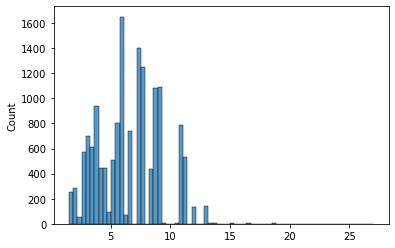

In [50]:
#Checking for normalization assumption
sns.histplot(sgroup)


<Axes: ylabel='Count'>

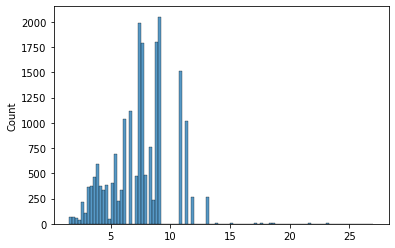

In [51]:
sns.histplot(fgroup)

In [52]:
import scipy.stats as stats
stats.ttest_ind(a=fgroup,b=sgroup,equal_var=True)

Ttest_indResult(statistic=33.812934643767264, pvalue=1.1884071158861187e-246)

#### Since p_value<0.05, therefore there's a statistically significant difference in means between mainstream group and the other group

In [53]:
Young_mainstreams=Young_sin_coup[Total_dataset['PREMIUM_CUSTOMER']
=='Mainstream'].reset_index(drop=True)
Young_mainstreams.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,company,LIFESTAGE,PREMIUM_CUSTOMER,ttest
0,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,150,Kettle,YOUNG SINGLES/COUPLES,Mainstream,Group1
1,2018-10-02,1,1020,27,7,Smiths Crinkle Original 330g,1,5.7,330,Kettle,YOUNG SINGLES/COUPLES,Mainstream,Group1
2,2019-05-02,1,1020,28,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,Kettle,YOUNG SINGLES/COUPLES,Mainstream,Group1
3,2018-08-17,1,1163,188,46,Kettle Original 175g,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,Group1
4,2019-02-07,1,1163,189,12,Natural Chip Co Tmato Hrb&Spce 175g,1,3.0,175,Natural,YOUNG SINGLES/COUPLES,Mainstream,Group1


In [54]:
#Changing column pack size to integer
Young_mainstreams['pack_size']=Young_mainstreams['pack_size'].astype(int)


In [55]:
Young_mainstreams['pack_size'].value_counts().sort_index()

70       63
90      128
110    2051
125      59
134    2315
135     290
150    3241
160     128
165    1102
170    1575
175    4997
180      70
190     148
200     179
210     576
220      62
250     280
270     620
300     282
330    1195
380     626
Name: pack_size, dtype: int64

[Text(0, 0, '63'),
 Text(0, 0, '128'),
 Text(0, 0, '2051'),
 Text(0, 0, '59'),
 Text(0, 0, '2315'),
 Text(0, 0, '290'),
 Text(0, 0, '3241'),
 Text(0, 0, '128'),
 Text(0, 0, '1102'),
 Text(0, 0, '1575'),
 Text(0, 0, '4997'),
 Text(0, 0, '70'),
 Text(0, 0, '148'),
 Text(0, 0, '179'),
 Text(0, 0, '576'),
 Text(0, 0, '62'),
 Text(0, 0, '280'),
 Text(0, 0, '620'),
 Text(0, 0, '282'),
 Text(0, 0, '1195'),
 Text(0, 0, '626')]

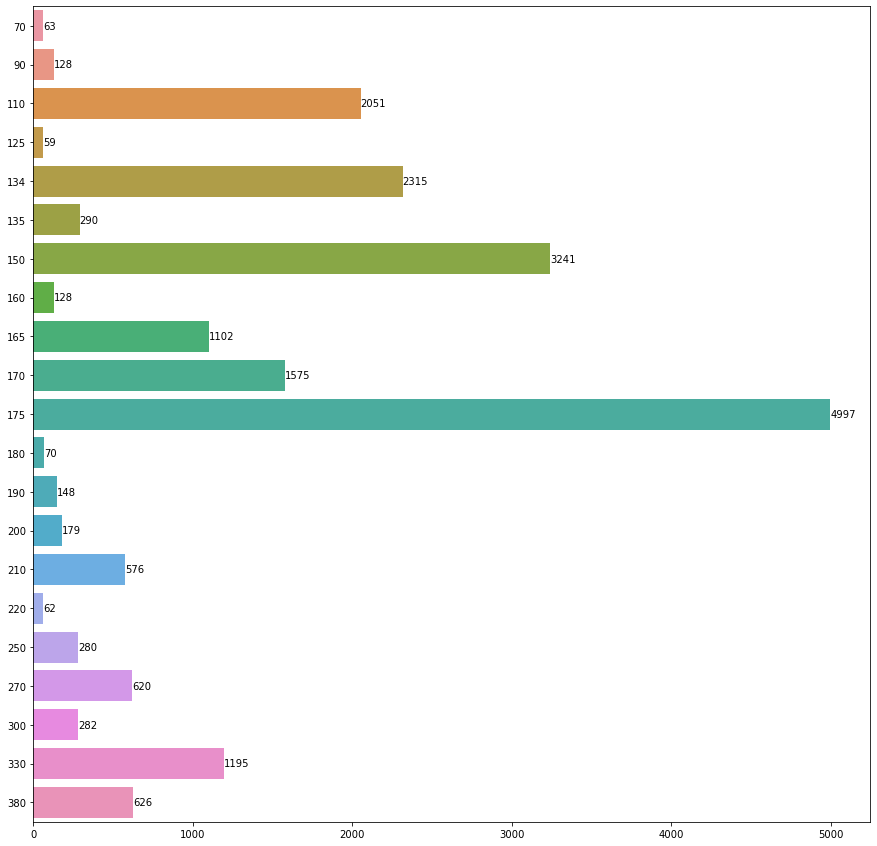

In [59]:
plt.figure(figsize=(15,15))
plot=Young_mainstreams['pack_size'].value_counts().sort_index()
ax=sns.barplot(y=plot.index,x=plot.values,orient='h')
plt.xticks()
ax.bar_label(ax.containers[0])


#### this segment of customers prefer most packsize 175g chips and they tend to prefer smaller sized chips

[Text(0, 0, '6087'),
 Text(0, 0, '3682'),
 Text(0, 0, '1830'),
 Text(0, 0, '1446'),
 Text(0, 0, '1372'),
 Text(0, 0, '1358'),
 Text(0, 0, '969'),
 Text(0, 0, '756'),
 Text(0, 0, '570'),
 Text(0, 0, '565'),
 Text(0, 0, '394'),
 Text(0, 0, '322'),
 Text(0, 0, '271'),
 Text(0, 0, '135'),
 Text(0, 0, '125'),
 Text(0, 0, '105')]

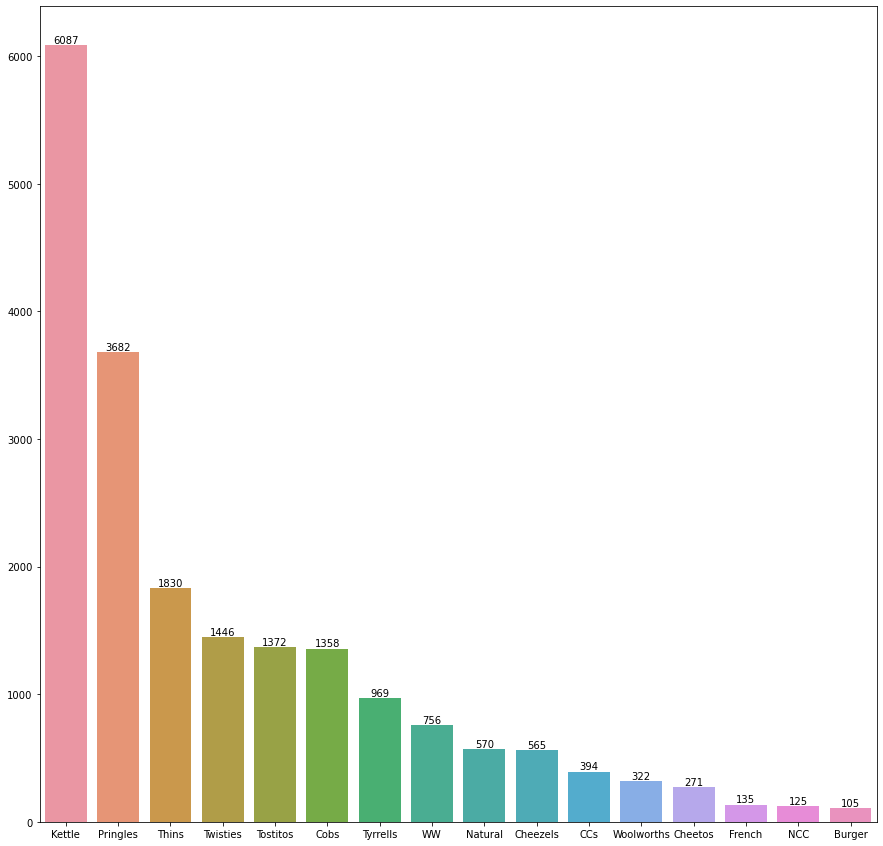

In [58]:
#check if there's a favorite company for this segment
plt.figure(figsize=(15,15))
plot=Young_mainstreams['company'].value_counts()
ax=sns.barplot(x=plot.index,y=plot.values)
plt.xticks()
ax.bar_label(ax.containers[0])

#### This segment seems to prefer kettle and pringles companies the most.

In [55]:
Total_dataset.to_csv('file11.csv')